# Training Module for Proposed Model

# Import Libraries

In [1]:
import pickle
import numpy as np
from plib.data import get_data,minmax_norm,data_split
from plib.feature_selection import out_features
from plib.p_metric import main_perf_metrics_calc
import  plib.emodel as model

# Read and Process Dataset

In [2]:
X_train ,Y_train,train_df =get_data('./plib/dataset/Heart Failure Analysis EDA.csv')
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
train_df.describe()

Number of rows: 299;  Number of columns: 13; No of missing values 0
Shape of X_train: (299, 12)
Shape of y_train: (299,)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


# Data Normalization

In [3]:
X_train=minmax_norm(X_train)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
classes=len(np.unique(Y_train))
print("Classes: ",classes)

Shape of X_train: (299, 12)
Shape of y_train: (299,)
Classes:  2


# Split Data for Train and Test

In [4]:
xtrain, xvalid, ytrain, yvalid,fold=data_split(X_train,Y_train,test_size=0.2)
print("Shape of X_train:", xtrain.shape)
print("Shape of y_train:", ytrain.shape)
print("Shape of X_test:", xvalid.shape)
print("Shape of y_test:", yvalid.shape)


Shape of X_train: (239, 12)
Shape of y_train: (239,)
Shape of X_test: (60, 12)
Shape of y_test: (60,)


# Feature Selection

In [5]:
opts = {'k':5, 'fold':fold, 'N':X_train.shape[0], 'T':7, 'w':0.7, 'c1':2, 'c2':2}
x_train, x_test, y_train, y_test,b_feat= out_features(X_train,Y_train,opts,xtrain, xvalid, ytrain, yvalid)
print ("Number of Best Features: ",b_feat)

sel_feat_ratio=60
w=round(x_train.shape[1]*sel_feat_ratio/100)
print(b_feat,w)
if w > b_feat:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    print('You choosed worse features too.')
else:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Iteration: 1
Best (PSO): 0.25440554056451486
Iteration: 2
Best (PSO): 0.25440554056451486
Run Time --- 0.3158566951751709 seconds ---
Number of Best Features:  6
6 7
Seleted Feature Composition:  (239, 7) (60, 7)
You choosed worse features too.
Shape of X_train: (239, 7)
Shape of y_train: (239,)
Shape of X_test: (60, 7)
Shape of y_test: (60,)


# Model Training

In [6]:
net=model.ensemble_models(0,x_train, y_train,x_test,y_test)
for x in range(len(net)): 
    #print("Name: ",x)
    net[x].summary()
    net[x].fit(x_train, y_train,
                  batch_size=10,
                  epochs=100,
                  validation_data=(x_test, y_test),
                  shuffle=False,verbose=0)
    net[x].save('model/ensemble.h5')
    

7
7
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 add (Add)                      (None, 7)            0           ['input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 7)            0           ['add[0][0]']                    
                                                                                                  
 add_1 (Add)                    (None, 7)            0           ['activation[0][0]',     

In [7]:
from tensorflow import keras
ensemble = keras.models.load_model('model/ensemble.h5')

loss_train,acc_train=ensemble.evaluate(x_train,y_train)
print("loss_train: ",loss_train)
print("acc_train: ",acc_train*100,"%")

8/8 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.6109
loss_train:  0.23753874003887177
acc_train:  61.08786463737488 %


# Ensemble Deep Learning

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.6109
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.6109
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.6109
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.6109
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.6109
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.6109
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.6109
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.6109
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.6109
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.6109
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.6109
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.6109
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.6109
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.6109
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.6109
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.6109
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.6109
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.6109
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.6109
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.6109


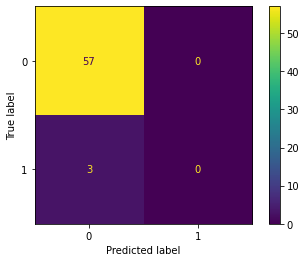

Accuracy, sensitivity, specificity, Precision, F1-score
(0.9344262295081968, 0.95, 0.9047619047619048, 0.95, 0.9500000000000001)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
filename = 'model/final_model.ensemble'
model = KerasClassifier(model=ensemble, epochs=100, batch_size=10, verbose=1)
model.fit(x_train, y_train)
pickle.dump(model, open(filename, 'wb'))

#load model
#model = pickle.load(open(filename, 'rb'))

y_pred=model.predict(x_test)
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table = dict()
measures_table['Ensemble_Train'] = measures

# Showing All performance Measures for Ensemble Classifier in Table

In [10]:
def header():
    for x in range(90):
        print ('-',end = '')
    print('')
    
header()
print ("{:<18} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10}".format('Classifier','Accuracy %', 'Sensitivity', 'Specificity','Precision','F1-Score'))
 
# print each data item.
for key, value in measures_table.items():
    Acc,Sen,Spec,Prec,F1 = value
#    header()
    if key == 'GradientBoosting':
        key ='Gradient'
    print ("{:<18} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10} ".format(key,round(Acc*100,3),round(Sen,3),round(Spec,3),round(Prec,3),round(F1,3)))
header()

------------------------------------------------------------------------------------------
Classifier         | Accuracy %  | Sensitivity | Specificity | Precision  | F1-Score  
Ensemble_Train     | 93.443      | 0.95        | 0.905       | 0.95       | 0.95       
------------------------------------------------------------------------------------------


# Saving Results to File

In [11]:
import os
# Create Folder for Results if not exist
if not os.path.exists('Results'):
    os.makedirs('Results')

In [12]:
#####################################################
                ## Using Pickle
################################################        
#import pickle
# Open a file and use dump()
#with open('results/NN.pkl', 'wb') as file:
    # A new file will be created
#    pickle.dump(measures_table, file)    

In [13]:
#####################################################
                ## Using CSV
################################################
# import csv
#w = csv.writer(open("Results/NN.csv", "wb"))

# loop over dictionary keys and values
#for key, val in measures_table.items():
#    print(key,val)
    # write every key and value to file
#    w.writerow([key, val])

In [14]:
#####################################################
                ## Using JSON
#####################################################
# load json module
import json

# python dictionary with key value pairs

# create json object from dictionary
json = json.dumps(measures_table)

# open file for writing, "w" 
f = open("Results/Proposed_Training.json","w")

# write json object to file
f.write(json)

# close file
f.close()